Для выполнения этого задания вам понадобятся данные о кредитных историях клиентов одного из банков. Поля в предоставляемых данных имеют следующий смысл:

LIMIT_BAL: размер кредитного лимита (в том числе и на семью клиента)
SEX: пол клиента (1 = мужской, 2 = женский )
EDUCATION: образование (0 = доктор, 1 = магистр; 2 = бакалавр; 3 = выпускник школы; 4 = начальное образование; 5= прочее; 6 = нет данных ).
MARRIAGE: (0 = отказываюсь отвечать; 1 = замужем/женат; 2 = холост; 3 = нет данных).
AGE: возраст в годах
PAY_0 - PAY_6 : История прошлых платежей по кредиту. PAY_6 - платеж в апреле, ... Pay_0 - платеж в сентябре. Платеж = (0 = исправный платеж, 1=задержка в один месяц, 2=задержка в 2 месяца ...)
BILL_AMT1 - BILL_AMT6: задолженность, BILL_AMT6 - на апрель, BILL_AMT1 - на сентябрь
PAY_AMT1 - PAY_AMT6: сумма уплаченная в PAY_AMT6 - апреле, ..., PAY_AMT1 - сентябре
default - индикатор невозврата денежных средств


In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats

In [4]:
%matplotlib inline

In [6]:
data=pd.read_csv('credit_card_default_analysis.csv')

In [7]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,2,2,1,24,2,2,0,0,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,0,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,0,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [8]:
data.shape

(30000, 25)

Задание

Размер кредитного лимита (LIMIT_BAL). В двух группах, тех людей, кто вернул кредит (default = 0) и тех, кто его не вернул (default = 1) проверьте гипотезы: a) о равенстве медианных значений кредитного лимита с помощью подходящей интервальной оценки b) о равенстве распределений с помощью одного из подходящих непараметрических критериев проверки равенства средних. Значимы ли полученные результаты с практической точки зрения ?


In [10]:
limit_bal_0=data[data.default==0]['LIMIT_BAL'].values
limit_bal_1=data[data.default==1]['LIMIT_BAL'].values


Populating the interactive namespace from numpy and matplotlib


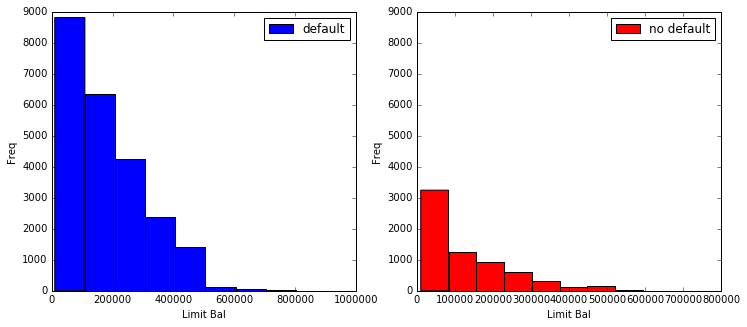

In [82]:
%pylab inline

pylab.figure(figsize(12, 5))
pylab.subplot(1,2,1)
pylab.hist(limit_bal_0,  color = 'b', label = 'default')
pylab.legend()
pylab.xlabel('Limit Bal')
pylab.ylabel('Freq')

pylab.subplot(1,2,2)
pylab.hist(limit_bal_1,  color = 'r', label = 'no default')
pylab.legend()
pylab.xlabel('Limit Bal')
pylab.ylabel('Freq')
plt.ylim(0, 9000)
pylab.show()



## Интервальная оценка медианы

а) Проверим равенство медиан с помощью метода bootstrap 

H0 : медианы равны

H1 : медианы не равны

In [37]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

In [39]:
def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [47]:
np.random.seed(0)

limit_bal_0_median_scores = list(map(np.median, get_bootstrap_samples(limit_bal_0, 1000)))
limit_bal_1_median_scores = list(map(np.median, get_bootstrap_samples(limit_bal_1, 1000)))

print ("95% confidence interval for the credit limit default=0:",  stat_intervals(limit_bal_0_median_scores, 0.05))
print ("95% confidence interval for the credit limit default=1(невозвращенный кредит):",  stat_intervals(limit_bal_1_median_scores, 0.05))

95% confidence interval for the credit limit default=0: [ 150000.  150000.]
95% confidence interval for the credit limit default=1(невозвращенный кредит): [ 80000.  90000.]


Интервальная оценка разности медиан

In [49]:
delta_median_scores = list(map(lambda x: x[1] - x[0], zip(limit_bal_0_median_scores, limit_bal_1_median_scores)))

In [50]:
print ("95% confidence interval for the difference between medians",  stat_intervals(delta_median_scores, 0.05))

95% confidence interval for the difference between medians [-70000. -60000.]


Вывод: Доверительные интервалы не пересекаются, и доверительный интервал разности не содержит ноль. Отсюда можно сделат вывод что нулевая гипотеза о равенстве медиан отвергается.

b) о равенстве распределений с помощью одного из подходящих непараметрических критериев проверки равенства средних. Значимы ли полученные результаты с практической точки зрения ?

In [62]:
u, pvalue = scipy.stats.mannwhitneyu(limit_bal_0, limit_bal_1)
print ('p-value:', pvalue)

p-value: 6.12774290911e-190


ВЫВОД:Значение p-value очень мало  по критерию Манна-Уитни, значительно меньше 0.05, поэтому нулевая гипотеза о равенстве медиан смело отвергается в пользу альтернативы.
Таким образом, достигаемый уровень значимости говорит о статистической значимости. 

О практической значимости говорить сложно, так как не логично предполагать что увеличение суммы кредита ведет к повышению вероятности возврата. 

TASK 2 

Пол (SEX): Проверьте гипотезу о том, что гендерный состав группы людей вернувших и не вернувших кредит отличается. Хорошо, если вы предоставите несколько различных решений этой задачи (с помощью доверительного интервала и подходящего статистического критерия)

In [110]:
import seaborn as sns

[[<matplotlib.text.Text at 0x1184f8d30>,

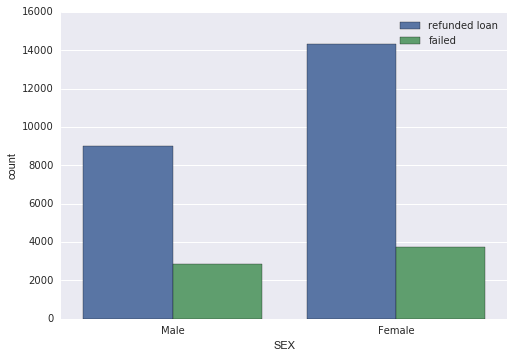

In [111]:
ax = sns.countplot(x="SEX", hue="default", data=data)
ax.legend(['refunded loan','failed'])
ax.set(xticklabels=['Male','Female'])

In [132]:
data_m=data[data.SEX==1].default.tolist()
data_f=data[data.SEX==2].default.tolist()

In [137]:
print(data_m[0:10])
print(data_f[0:10])

[0, 0, 0, 0, 1, 0, 1, 0, 0, 0]
[1, 1, 0, 0, 0, 0, 0, 0, 0, 0]


Признак default бинарный, следовательно распределение Бернулли.

Для проверки нулевой гипотезы воспользуемся сначала z-критерием для разности долей:

$H_0\colon $ гендерный состав группы людей вернувших и не вернувших кредит не отличается

$H_1\colon $ гендерный состав группы людей вернувших и не вернувших кредит отличается

Построим доверительный интервал для разности долей (выборки независимы). 

In [145]:
def proportions_confint_diff_ind(sample1, sample2, alpha = 0.05):    
    z = scipy.stats.norm.ppf(1 - alpha / 2.)   
    p1 = float(sum(sample1)) / len(sample1)
    p2 = float(sum(sample2)) / len(sample2)
    
    left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    
    return (left_boundary, right_boundary)

In [148]:
def proportions_diff_z_stat_ind(sample1, sample2):
    n1 = len(sample1)
    n2 = len(sample2)
    
    p1 = float(sum(sample1)) / n1
    p2 = float(sum(sample2)) / n2 
    P = float(p1*n1 + p2*n2) / (n1 + n2)
    
    return (p1 - p2) / np.sqrt(P * (1 - P) * (1. / n1 + 1. / n2))

In [149]:
def proportions_diff_z_test(z_stat, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    if alternative == 'two-sided':
        return 2 * (1 - scipy.stats.norm.cdf(np.abs(z_stat)))
    
    if alternative == 'less':
        return scipy.stats.norm.cdf(z_stat)

    if alternative == 'greater':
        return 1 - scipy.stats.norm.cdf(z_stat)

In [151]:

print ("confidence interval:" , proportions_confint_diff_ind(data_m, data_f))
print ("p-value: ", proportions_diff_z_test(proportions_diff_z_stat_ind(data_m, data_f)))

confidence interval: (0.024207372179792706, 0.043611558570817201)
p-value:  4.47286652161e-12


Доверительный 95% интервал для разности двух долей независимых выборок не содержит 0, следовательно нулевая гипотеза отвергается в пользу альтернативной (возврат кредита в определенной степени детерминирован гендерным составом).
Провяем  гипотезу о равенстве долей гендерного состава групп людей вернувших и не вернувших кредит. Достигаемый уровень значимости, используя двустороннюю альтернативу, очень мал. Нулевая гипотеза отвергается в пользу альтернативной.

TASK 3

Образование (EDUCATION): Проверьте гипотезу о том, что образование не влияет на то, вернет ли человек долг. Предложите способ наглядного представления разницы в ожидаемых и наблюдаемых значениях количества человек вернувших и не вернувших долг. Например, составьте таблицу сопряженности "образование" на "возврат долга", где значением ячейки была бы разность между наблюдаемым и ожидаемым количеством человек. Как бы вы предложили модифицировать таблицу так, чтобы привести значения ячеек к одному масштабу не потеряв в интерпретируемости ? Наличие какого образования является наилучшим индикатором того, что человек отдаст долг ? наоборт, не отдаст долг ?


[[<matplotlib.text.Text at 0x119a6b3c8>,

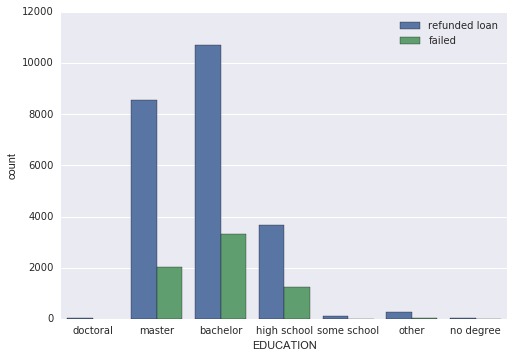

In [170]:
ax = sns.countplot(x="EDUCATION", hue="default", data=data)
ax.legend(['refunded loan','failed'])
ax.set(xticklabels=['doctoral', 'master','bachelor', 'high school', 'some school','other', 'no degree'])

Проверяем гипотезу

$H_0\colon $ уровень образования не влияет на возврат долга

$H_1\colon $ уровень образования влияет на возврат долга

Признаки категориальные.Воспользуемся коэффициентом V Крамера. Уровень достигаемой значимости вычисляется с помощью статистики $\chi^2$

In [204]:
EDU_0 = np.bincount(data[data['default'] == 0]['EDUCATION'].values)
EDU_1= np.bincount(data[data['default'] == 1]['EDUCATION'].values)
print(EDU_0,EDU_1)

[   14  8549 10700  3680   116   262    43] [   0 2036 3330 1237    7   18    8]


In [230]:
df = pd.DataFrame({'Refunded' : EDU_0, 'Failed to paid' : EDU_1})
df.index=[['doctoral', 'master','bachelor', 'high school', 'some school','other', 'no degree']]
df

,Failed to paid,Refunded
doctoral,0,14
master,2036,8549
bachelor,3330,10700
high school,1237,3680
some school,7,116
other,18,262
no degree,8,43


In [ ]:
import scipy.stats as scs

In [422]:
edu_distr=[[14, 0], [8549, 2036], [10700, 3330], [3680, 1237], [116, 7], [262, 18], [43, 8]]


In [424]:
corr = np.sqrt(scipy.stats.chi2_contingency(edu_distr)[0]/sum(edu_distr))
print ("Значение коэффициента V Крамера: %f" %corr)

Значение коэффициента V Крамера: 0.073760


In [233]:
chi2, p, dof, expected= scs.chi2_contingency([[14, 0], [8549, 2036], [10700, 3330], [3680, 1237], [116, 7], [262, 18], [43, 8]])
p

1.2332626245415605e-32

ВЫВОД: Нулевая гипотеза H0 : уровень образования не влияет на возврат долга, против двусторонней альтернативы критерием хи-квадрат  отвергается. Достигаемый уровень значимости p = 1.23 e-32 очень мал, значительно меньше , чем уровень значимости 0.05. Таким образом, можно утверждать, что между этими двумя признаками есть связь.

Основанием для применения критерия хи-квадрат должны выполняться следующие условия , чтобы выборки были достаточно большими: n ≥ 40. Кроме того, необходимо, чтобы каждая из следующих четырёх величин была больше 5. 
Кроме того, необходимо, чтобы ожидаемое
количество элементов в каждой ячейке таблицы было меньше 5 (ni+n+j < 5), не более, чем в 20% ячеек.
Выборки должны быть независимы.

Все вышеуказанные критерии соблюдаются, за исключением недостаточной выборки докторов (всего 14) для применения данного критерия. 

Рассмотрим относительную разницу между фактическими значениями и ожидаемыми, так как абсолютную разницу можно неверно интерпретировать.

In [234]:
expected

array([[  1.09032000e+01,   3.09680000e+00],
       [  8.24359800e+03,   2.34140200e+03],
       [  1.09265640e+04,   3.10343600e+03],
       [  3.82935960e+03,   1.08764040e+03],
       [  9.57924000e+01,   2.72076000e+01],
       [  2.18064000e+02,   6.19360000e+01],
       [  3.97188000e+01,   1.12812000e+01]])

In [243]:
dif=[(int(pair[0]), int(pair[1])) for pair in expected] #oжидаемое кол-во человек для 
dif

[(10, 3),
 (8243, 2341),
 (10926, 3103),
 (3829, 1087),
 (95, 27),
 (218, 61),
 (39, 11)]

In [261]:
myarray = np.asarray(dif)
myarray[:,1]

array([   3, 2341, 3103, 1087,   27,   61,   11])

In [262]:
np.subtract(EDU_0,myarray[:,0])

array([   4,  306, -226, -149,   21,   44,    4])

In [263]:
np.subtract(EDU_1,myarray[:,1])

array([  -3, -305,  227,  150,  -20,  -43,   -3])

In [264]:
df = pd.DataFrame({'Refunded' : np.subtract(EDU_0,myarray[:,0]), 'Failed to paid' : np.subtract(EDU_1,myarray[:,1])})
df.index=[['doctoral', 'master','bachelor', 'high school', 'some school','other', 'no degree']]
df

,Failed to paid,Refunded
doctoral,-3,4
master,-305,306
bachelor,227,-226
high school,150,-149
some school,-20,21
other,-43,44
no degree,-3,4


In [283]:
sumx=np.sum(abs(np.subtract(EDU_0,myarray[:,0])))
sumy=np.sum(abs(np.subtract(EDU_1,myarray[:,1])))
#np.sum(x)
norm_1=abs(np.subtract(EDU_0,myarray[:,0])/sumx)
norm_2=abs(np.subtract(EDU_1,myarray[:,1])/sumy)

In [285]:
def normalize(v):
    norm=np.linalg.norm(v)
    if norm==0: 
       return v
    return v/norm

In [287]:
df = pd.DataFrame({'Refunded' : normalize(np.subtract(EDU_0,myarray[:,0])), 'Failed to paid' : norm_2})
df.index=[['doctoral', 'master','bachelor', 'high school', 'some school','other', 'no degree']]
df

,Failed to paid,Refunded
doctoral,0.003995,0.009721
master,0.406125,0.743643
bachelor,0.302264,-0.549227
high school,0.199734,-0.362101
some school,0.026631,0.051034
other,0.057257,0.106929
no degree,0.003995,0.009721


In [284]:
df = pd.DataFrame({'Refunded' : norm_1, 'Failed to paid' : norm_2})
df.index=[['doctoral', 'master','bachelor', 'high school', 'some school','other', 'no degree']]
df

,Failed to paid,Refunded
doctoral,0.003995,0.005305
master,0.406125,0.405836
bachelor,0.302264,0.299735
high school,0.199734,0.197613
some school,0.026631,0.027851
other,0.057257,0.058355
no degree,0.003995,0.005305


Из таблицы выше (с нормализованными значениями) видно, что лучшая кредитная история у группы с дипломом магистр (группу с докторской степенью не рассматриваем за недостаточностью выборки). Худшие показатели по возврату долга у группы лишь со школьным образованием. 


TASK 4
Семейное положение (MARRIAGE): Проверьте, как связан семейный статус с индикатором дефолта: нужно предложить меру, по которой можно измерить возможную связь этих переменных и посчитать ее значение.

[[<matplotlib.text.Text at 0x11b7cd358>,

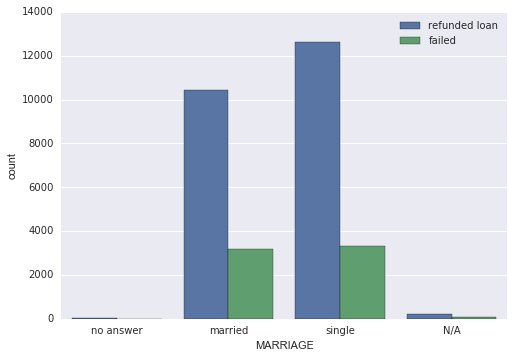

In [293]:
ax = sns.countplot(x="MARRIAGE", hue="default", data=data)
ax.legend(['refunded loan','failed'])
ax.set(xticklabels=['no answer', 'married','single', 'N/A'])

In [295]:
MAR_0 = np.bincount(data[data['default'] == 0]['MARRIAGE'].values)
MAR_1= np.bincount(data[data['default'] == 1]['MARRIAGE'].values)
print(MAR_0,MAR_1)

[   49 10453 12623   239] [   5 3206 3341   84]


In [296]:
df = pd.DataFrame({'Refunded' : MAR_0, 'Failed to paid' : MAR_1})
df.index=[['no answer', 'married','single', 'N/A']]
df

,Failed to paid,Refunded
no answer,5,49
married,3206,10453
single,3341,12623
N/A,84,239


In [301]:
f=[[5, 49], [3206, 10453], [3341, 12623], [84, 239]]

In [300]:
chi2, p, dof, expected= scs.chi2_contingency([[5, 49], [3206, 10453], [3341, 12623], [84, 239]])


In [303]:

coef = np.sqrt(chi2 / (np.sum(f) * (2-1)))
coef

0.034478203662766466

ВЫВОД: Для измерения возможной связи этих переменных посчитали коэффициент V Крамера для категоральных признаков. Он основывается на критерии Хи-квадрат. Необходимые условия для применения коэффициента V Крамера (а именно, размер выборки больше 40, количество элементов в каждой ячейке таблицы меньше 5 не более, чем в 20% ячеек, выборки независимы),выполняются.
Коэффициент V Крамера близок к нулю, то есть можно сделать вывод, что корреляция очень слабая между признаками, то есть семейное положение не значительно влияет на возврат кредита.

TASK 5

Возраст (AGE): Относительно двух групп людей вернувших и не вернувших кредит проверьте следующие гипотезы: a) о равенстве медианных значений возрастов людей b) о равенстве распределений с помощью одного из подходящих непараметрических критериев проверки равенства средних. Значимы ли полученные результаты с практической точки зрения ?


In [330]:
AGE_0 = data[data.default == 0]['AGE'].values
AGE_1 = data[data.default == 1]['AGE'].values

(0, 50)

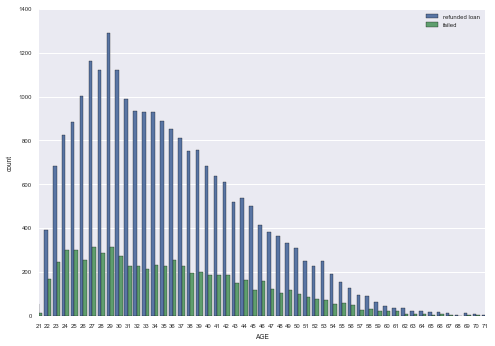

In [391]:
ax = sns.countplot(x="AGE", hue="default", data=data)
ax.legend(['refunded loan','failed'])
sns.set(font_scale=0.8)
ax.set_xlim(0, 50)
#x = np.linspace(1., 8., 30)
#ax.set_xticks(np.linspace([2,80])


Проверим гипотезу: медианы равны : $$H_0: med(X_1) = med(X_2)$$ против двусторонней альтернативы неравенстве медиан: $$H_1: med(X_1) \neq med(X_2)$$
Так как истинное распределение признака нам неизвестно, можно воспользоваться бутстрепом или ранговым критерием Манна-Уитни.
Сначала построим интервальную оценку разности медиан с помощью бутстрепа:

In [399]:
np.random.seed(0)

AGE_0_median_scores = list(map(np.median, get_bootstrap_samples(AGE_0, 1000)))
AGE_1_median_scores = list(map(np.median, get_bootstrap_samples(AGE_1, 1000)))

print ("95% confidence interval for the credit limit default=0:",  stat_intervals(AGE_0_median_scores, 0.05))
print ("95% confidence interval for the credit limit default=1(невозвращенный кредит):",  stat_intervals(AGE_1_median_scores, 0.05))

95% confidence interval for the credit limit default=0: [ 34.  34.]
95% confidence interval for the credit limit default=1(невозвращенный кредит): [ 34.  35.]


In [405]:
delta_median_scores = list(map(lambda x: x[1] - x[0], zip(AGE_0_median_scores, AGE_1_median_scores)))

In [408]:
print ("95% confidence interval for the difference between medians",  stat_intervals(delta_median_scores, 0.05))

95% confidence interval for the difference between medians [ 0.  1.]


Доверительный интервал содержит ноль, поэтому на уровне значимости $\alpha = 0.05$ нулевая гипотеза не отвергается.


# Двухвыборочные критерии для независимых выборок

In [414]:
import numpy as np
import pandas as pd
import itertools

from scipy import stats
from statsmodels.stats.descriptivestats import sign_test
from statsmodels.stats.weightstats import zconfint
from statsmodels.stats.weightstats import *

In [415]:
print ( '95%% confidence interval for the mean: [%f, %f]' % zconfint(AGE_0))

95% confidence interval for the mean: [35.300871, 35.533661]


In [416]:
print ( '95%% confidence interval for the mean: [%f, %f]' % zconfint(AGE_1))

95% confidence interval for the mean: [35.492515, 35.958962]


## Ранговый критерий Манна-Уитни


$$H_0\colon F_{X_1}(x) = F_{X_2}(x)$$

$$H_1\colon F_{X_1}(x) = F_{X_2}(x + \Delta), \Delta\neq 0$$

In [417]:
stats.mannwhitneyu(AGE_0, AGE_1)

MannwhitneyuResult(statistic=76966879.5, pvalue=0.18625177174493079)

Перед нами значение статистики и p-value. p-value довольно большой, поэтому отвергнуть нулевую гипотезу мы не можем. Мы не можем сказать, что медианы не равны.

Таким образом, мы не смогли опровергнуть гипотезу о равенстве медиан в пользу не равенства медиан (возвраст влияет на возврат кредита) с помощью критерия Манна-Уитни.